# Collation of the Lord's prayer

In [1]:
import json
from collatex import Collation, collate
import unicodedata
import pandas as pd
import graphviz

## Load the data

In [4]:
with open("data/Mt.json", "r") as f:
    mat = json.load(f)
    
with open("data/Lc.json", "r") as f:
    lk = json.load(f)
    
with open("data/Didache.json", "r") as f:
    didache = json.load(f)
    
with open("data/Current.json", "r") as f:
    current = json.load(f)

In [3]:
for verse_nbr, witnesses in mat["6"].items():
    print(verse_nbr)
    print(witnesses["03"])

9
ουτως ουν προσευχεσθε υμεις πατερ ημων ο εν τοις ουρανοις αγιασθητω το ονομα σου
10
ελθετω η βασιλεια σου γενηθητω το θελημα σου ως εν ουρανω και επι γης
11
τον αρτον ημων τον επιουσιον δος ημιν σημερον
12
και αφες ημιν τα οφειληματα ημων ως και ημεις αφηκαμεν τοις οφειλεταις ημων
13
και μη εισενεγκης ημας εις πειρασμον αλλα ρυσαι ημας απο του πονηρου


## Build collation table within each book

Mat6: 9


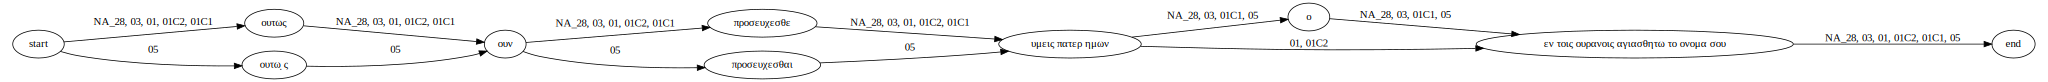

Mat6: 10


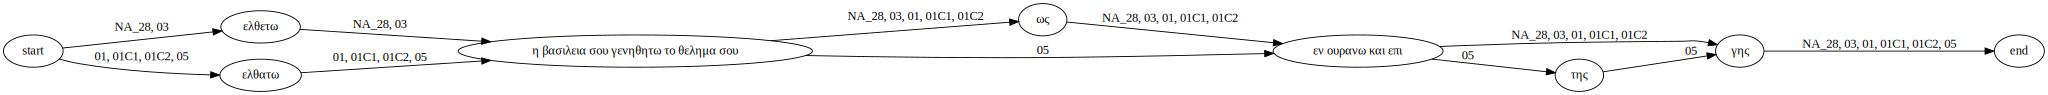

Mat6: 11


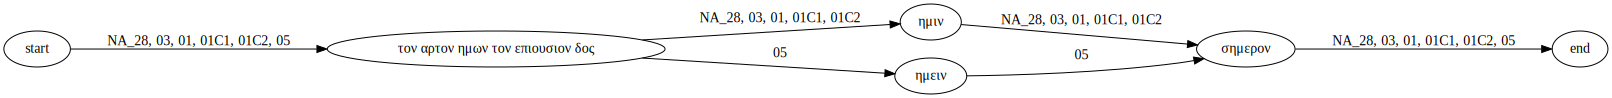

Mat6: 12


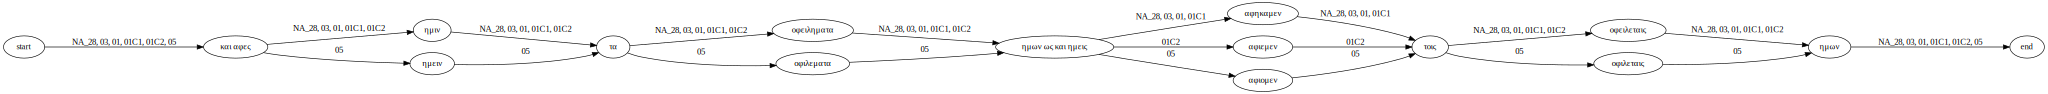

Mat6: 13


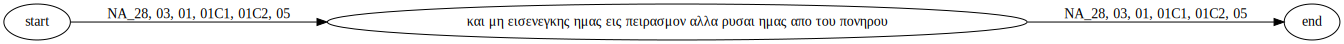

In [27]:
for verse_nbr, witnesses in mat["6"].items():
    print(f"Mat6: {verse_nbr}")
    collation = Collation()
    for witness_name, witness_content in witnesses.items():
        collation.add_plain_witness(witness_name, witness_content)
    alignment_table = collate(collation, output="svg_simple", layout="horizontal")

In [28]:
print("====== Collation for Lk 11")

for verse_nbr, witnesses in lk["11"].items():
    print(f"====== Verse number: {verse_nbr}")
    collation = Collation()
    for witness_name, witness_content in witnesses.items():
        collation.add_plain_witness(witness_name, witness_content)
    alignment_table = collate(collation, output="html2")

====== Collation for Lk 11
====== Verse number: 2


====== Verse number: 3


====== Verse number: 4


## Build collation table for the prayer only of Mt, Lk and the Didache

In [6]:
# Merge each verse to get the full prayer per witness
lk_prayer = {}
for verse_nbr, witnesses in lk["11"].items():
    for witness_name, witness_content in witnesses.items():
        try:
            lk_prayer[witness_name] += " " + witness_content
        except KeyError:
            lk_prayer[witness_name] = witness_content.replace("ειπεν δε αυτοις οταν προσευχησθε λεγετε", "")
            if witness_name == "02":
                # Take care of variant for 02
                lk_prayer[witness_name] = witness_content.replace("ειπεν δε αυτοις οταν προσευχεσθε λεγετε", "")
        lk_prayer[witness_name] = lk_prayer[witness_name].strip()
            
mt_prayer = {}
for verse_nbr, witnesses in mat["6"].items():
    for witness_name, witness_content in witnesses.items():
        try:
            mt_prayer[witness_name] += " " + witness_content
        except KeyError:
            mt_prayer[witness_name] = witness_content
            mt_prayer[witness_name] = mt_prayer[witness_name].replace("ουτως ουν προσευχεσθε υμεις", "")
            mt_prayer[witness_name] = mt_prayer[witness_name].replace("ουτω̣ς ουν προσευχεσθαι υμεις", "")
        mt_prayer[witness_name] = mt_prayer[witness_name].strip()
            
didache_prayer = didache["8"]

In [7]:
# Compare Luke and Mt
collation = Collation()

witness_list = ["01", "03", "05", "NA_28"]

for witness in witness_list:
    try:
        collation.add_plain_witness("Mt-"+witness, mt_prayer[witness])
    except KeyError:
        pass
    collation.add_plain_witness("Lc-"+witness, lk_prayer[witness])

    
alignment_table = collate(collation, layout="vertical", output="html2")

In [8]:
collation = Collation()

witness_names = ["01", "01C1", "01C2", "03", "05", "NA_28"]

for witness_name in witness_names:
    collation.add_plain_witness("Mt-"+witness_name, mt_prayer[witness_name])
    
collation.add_plain_witness("Didache", didache_prayer)
        
alignment_table = collate(collation, layout="vertical", output="html2")

In [9]:
collation = Collation()

witness_names = ["01", "01C2", "02", "03", "05", "NA_28"]

for witness_name in witness_names:
    collation.add_plain_witness("Lc-"+witness_name, lk_prayer[witness_name])
    
        
alignment_table = collate(collation, layout="vertical", output="html2")

In [10]:
# Comparison of current prayer to Mathew 

collation = Collation()

witness_list = ["NA_28", "03"]

for witness_name, content in mt_prayer.items():
    if witness_name in witness_list:
        collation.add_plain_witness("Mt-"+witness_name, content)

collation.add_plain_witness("Version liturgique", current["current"])

alignment_table = collate(collation, layout="vertical", output="html2")

## Latex conversion
This section can be ignored, its sole purpose is the easy translation of collationed text into latex table.

In [45]:
# Read generated html into pandas for latex conversion
df = pd.read_html(
"""
<table border="1" style="border: 1px solid #000000; border-collapse: collapse;" cellpadding="4">
 <tbody><tr>
  <th>Mt-01</th>
  <th>Lc-01</th>
  <th>Mt-03</th>
  <th>Lc-03</th>
  <th>Mt-05</th>
  <th>Lc-05</th>
  <th>Mt-NA_28</th>
  <th>Lc-NA_28</th>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ο δε ειπεν οταν
προσευχησθε μη
βαττολογειτε ως οι
λοιποι δοκουσιν γαρ
τινες οτι εν τη
πολυλογεια αυτων
εισακουσθησονται
αλλα προσευχομενοι
λεγετε</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ο</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ο</td>
  <td bgcolor="FF0000">ο</td>
  <td bgcolor="FF0000">ο</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">εν τοις ουρανοις</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">εν τοις ουρανοις</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">εν τοις ουρανοις</td>
  <td bgcolor="FF0000">εν τοις ουρανοις</td>
  <td bgcolor="FF0000">εν τοις ουρανοις</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ελθατω</td>
  <td bgcolor="FF0000">ελθατω</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ελθατω</td>
  <td bgcolor="FF0000">εφ ημας</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ελθετω</td>
  <td bgcolor="FF0000">ελθετω</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ελθετω</td>
  <td bgcolor="FF0000">ελθετω</td>
  <td bgcolor="FF0000">ελθετω</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">εν ουρανω</td>
  <td bgcolor="FF0000">εν ουρανω</td>
  <td bgcolor="FF0000">εν ουρανω</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">εν ουρανω</td>
  <td bgcolor="FF0000">εν ουρανω</td>
  <td bgcolor="FF0000">εν ουρανω</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ουτω</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">και επι</td>
  <td bgcolor="FF0000">και επι</td>
  <td bgcolor="FF0000">και επι</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">και επι</td>
  <td bgcolor="FF0000">και επι</td>
  <td bgcolor="FF0000">και επι</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">της</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">γης</td>
  <td bgcolor="FF0000">γης</td>
  <td bgcolor="FF0000">γης</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">γης</td>
  <td bgcolor="FF0000">γης</td>
  <td bgcolor="FF0000">γης</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">δος</td>
  <td bgcolor="FF0000">δος</td>
  <td bgcolor="FF0000">δος</td>
  <td bgcolor="FF0000">διδου</td>
  <td bgcolor="FF0000">δος</td>
  <td bgcolor="FF0000">δος</td>
  <td bgcolor="FF0000">δος</td>
  <td bgcolor="FF0000">διδου</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημειν</td>
  <td bgcolor="FF0000">ημειν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">σημερον</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">σημερον</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">σημερον</td>
  <td bgcolor="FF0000">σημερον</td>
  <td bgcolor="FF0000">σημερον</td>
  <td bgcolor="FF0000">το</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">καθ ημεραν</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">καθ ημεραν</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">καθ ημεραν</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημειν</td>
  <td bgcolor="FF0000">ημειν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">τα</td>
  <td bgcolor="FF0000">τας αμαρτιας</td>
  <td bgcolor="FF0000">τα</td>
  <td bgcolor="FF0000">τας αμαρτιας</td>
  <td bgcolor="FF0000">τα</td>
  <td bgcolor="FF0000">τα</td>
  <td bgcolor="FF0000">τα</td>
  <td bgcolor="FF0000">τας αμαρτιας</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">οφειληματα</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">οφειληματα</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">οφιλεματα</td>
  <td bgcolor="FF0000">οφιλεματα</td>
  <td bgcolor="FF0000">οφειληματα</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ημεις</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ημεις</td>
  <td bgcolor="FF0000">γαρ</td>
  <td bgcolor="FF0000">ημεις</td>
  <td bgcolor="FF0000">ημεις</td>
  <td bgcolor="FF0000">ημεις</td>
  <td bgcolor="FF0000">γαρ</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">αφηκαμεν</td>
  <td bgcolor="FF0000">αυτοι</td>
  <td bgcolor="FF0000">αφηκαμεν</td>
  <td bgcolor="FF0000">αυτοι</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αφειομεν</td>
  <td bgcolor="FF0000">αφηκαμεν</td>
  <td bgcolor="FF0000">αυτοι</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αφιεμεν</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αφιομεν</td>
  <td bgcolor="FF0000">αφιομεν</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αφιομεν</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">τοις</td>
  <td bgcolor="FF0000">παντι οφειλοντι ημιν</td>
  <td bgcolor="FF0000">τοις</td>
  <td bgcolor="FF0000">παντι οφειλοντι ημιν</td>
  <td bgcolor="FF0000">τοις</td>
  <td bgcolor="FF0000">τοις</td>
  <td bgcolor="FF0000">τοις</td>
  <td bgcolor="FF0000">παντι οφειλοντι ημιν</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">οφειλεταις</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">οφειλεταις</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">οφιλεταις</td>
  <td bgcolor="FF0000">οφειλεταις</td>
  <td bgcolor="FF0000">οφειλεταις</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">ημων</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="FF0000">αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="FF0000">αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="FF0000">-</td>
 </tr>
</tbody></table>
"""
)

In [46]:
print(df[0].to_latex(index=False).replace(r"\\", r"\\ \midrule"))

\begin{tabular}{llllllll}
\toprule
Mt-01 & Lc-01 & Mt-03 & Lc-03 & Mt-05 & Lc-05 & Mt-NA_28 & Lc-NA_28 \\ \midrule
\midrule
- & - & - & - & - & ο δε ειπεν οταν προσευχησθε μη βαττολογειτε ως οι λοιποι δοκουσιν γαρ τινες οτι εν τη πολυλογεια αυτων εισακουσθησονται αλλα προσευχομενοι λεγετε & - & - \\ \midrule
πατερ & πατερ & πατερ & πατερ & πατερ & πατερ & πατερ & πατερ \\ \midrule
ημων & - & ημων & - & ημων & ημων & ημων & - \\ \midrule
- & - & ο & - & ο & ο & ο & - \\ \midrule
εν τοις ουρανοις & - & εν τοις ουρανοις & - & εν τοις ουρανοις & εν τοις ουρανοις & εν τοις ουρανοις & - \\ \midrule
αγιασθητω & αγιασθητω & αγιασθητω & αγιασθητω & αγιασθητω & αγιασθητω & αγιασθητω & αγιασθητω \\ \midrule
το & το & το & το & το & - & το & το \\ \midrule
ονομα σου & ονομα σου & ονομα σου & ονομα σου & ονομα σου & ονομα σου & ονομα σου & ονομα σου \\ \midrule
ελθατω & ελθατω & - & - & ελθατω & εφ ημας & - & - \\ \midrule
- & - & ελθετω & ελθετω & - & ελθετω & ελθετω & ελθετω \\ \midrule
- & - & -

In [47]:
df = pd.read_html(
"""
<table border="1" style="border: 1px solid #000000; border-collapse: collapse;" cellpadding="4">
 <tbody><tr>
  <th>Mt-01</th>
  <th>Mt-01C1</th>
  <th>Mt-01C2</th>
  <th>Mt-03</th>
  <th>Mt-05</th>
  <th>Mt-NA_28</th>
  <th>Didache</th>
 </tr>
 <tr>
  <td bgcolor="00FFFF">πατερ ημων</td>
  <td bgcolor="00FFFF">πατερ ημων</td>
  <td bgcolor="00FFFF">πατερ ημων</td>
  <td bgcolor="00FFFF">πατερ ημων</td>
  <td bgcolor="00FFFF">πατερ ημων</td>
  <td bgcolor="00FFFF">πατερ ημων</td>
  <td bgcolor="00FFFF">πατερ ημων</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ο</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ο</td>
  <td bgcolor="FF0000">ο</td>
  <td bgcolor="FF0000">ο</td>
  <td bgcolor="FF0000">ο</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">εν</td>
  <td bgcolor="00FFFF">εν</td>
  <td bgcolor="00FFFF">εν</td>
  <td bgcolor="00FFFF">εν</td>
  <td bgcolor="00FFFF">εν</td>
  <td bgcolor="00FFFF">εν</td>
  <td bgcolor="00FFFF">εν</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">τοις ουρανοις</td>
  <td bgcolor="FF0000">τοις ουρανοις</td>
  <td bgcolor="FF0000">τοις ουρανοις</td>
  <td bgcolor="FF0000">τοις ουρανοις</td>
  <td bgcolor="FF0000">τοις ουρανοις</td>
  <td bgcolor="FF0000">τοις ουρανοις</td>
  <td bgcolor="FF0000">τῷ οuρανῷ</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">αγιασθητω το ονομα
σου</td>
  <td bgcolor="00FFFF">αγιασθητω το ονομα
σου</td>
  <td bgcolor="00FFFF">αγιασθητω το ονομα
σου</td>
  <td bgcolor="00FFFF">αγιασθητω το ονομα
σου</td>
  <td bgcolor="00FFFF">αγιασθητω το ονομα
σου</td>
  <td bgcolor="00FFFF">αγιασθητω το ονομα
σου</td>
  <td bgcolor="00FFFF">αγιασθητω το ονομα
σου</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ελθατω</td>
  <td bgcolor="FF0000">ελθατω</td>
  <td bgcolor="FF0000">ελθατω</td>
  <td bgcolor="FF0000">ελθετω</td>
  <td bgcolor="FF0000">ελθατω</td>
  <td bgcolor="FF0000">ελθετω</td>
  <td bgcolor="FF0000">ελθετω</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">η βασιλεια σου
γενηθητω το θελημα
σου</td>
  <td bgcolor="00FFFF">η βασιλεια σου
γενηθητω το θελημα
σου</td>
  <td bgcolor="00FFFF">η βασιλεια σου
γενηθητω το θελημα
σου</td>
  <td bgcolor="00FFFF">η βασιλεια σου
γενηθητω το θελημα
σου</td>
  <td bgcolor="00FFFF">η βασιλεια σου
γενηθητω το θελημα
σου</td>
  <td bgcolor="00FFFF">η βασιλεια σου
γενηθητω το θελημα
σου</td>
  <td bgcolor="00FFFF">η βασιλεια σου
γενηθητω το θελημα
σου</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">ως</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">εν ουρανω και επι</td>
  <td bgcolor="00FFFF">εν ουρανω και επι</td>
  <td bgcolor="00FFFF">εν ουρανω και επι</td>
  <td bgcolor="00FFFF">εν ουρανω και επι</td>
  <td bgcolor="00FFFF">εν ουρανω και επι</td>
  <td bgcolor="00FFFF">εν ουρανω και επι</td>
  <td bgcolor="00FFFF">εν ουρανω και επι</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">της</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος</td>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος</td>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος</td>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος</td>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος</td>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος</td>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημειν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">σημερον και αφες</td>
  <td bgcolor="00FFFF">σημερον και αφες</td>
  <td bgcolor="00FFFF">σημερον και αφες</td>
  <td bgcolor="00FFFF">σημερον και αφες</td>
  <td bgcolor="00FFFF">σημερον και αφες</td>
  <td bgcolor="00FFFF">σημερον και αφες</td>
  <td bgcolor="00FFFF">σημερον και αφες</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημειν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">τα</td>
  <td bgcolor="00FFFF">τα</td>
  <td bgcolor="00FFFF">τα</td>
  <td bgcolor="00FFFF">τα</td>
  <td bgcolor="00FFFF">τα</td>
  <td bgcolor="00FFFF">τα</td>
  <td bgcolor="00FFFF">τα</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">οφειληματα</td>
  <td bgcolor="FF0000">οφειληματα</td>
  <td bgcolor="FF0000">οφειληματα</td>
  <td bgcolor="FF0000">οφειληματα</td>
  <td bgcolor="FF0000">οφιλεματα</td>
  <td bgcolor="FF0000">οφειληματα</td>
  <td bgcolor="FF0000">οφειληματα</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">ημων ως και ημεις</td>
  <td bgcolor="00FFFF">ημων ως και ημεις</td>
  <td bgcolor="00FFFF">ημων ως και ημεις</td>
  <td bgcolor="00FFFF">ημων ως και ημεις</td>
  <td bgcolor="00FFFF">ημων ως και ημεις</td>
  <td bgcolor="00FFFF">ημων ως και ημεις</td>
  <td bgcolor="00FFFF">ημων ως και ημεις</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">αφηκαμεν</td>
  <td bgcolor="FF0000">αφηκαμεν</td>
  <td bgcolor="FF0000">αφιεμεν</td>
  <td bgcolor="FF0000">αφηκαμεν</td>
  <td bgcolor="FF0000">αφιομεν</td>
  <td bgcolor="FF0000">αφηκαμεν</td>
  <td bgcolor="FF0000">αφιεμεν</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">τοις</td>
  <td bgcolor="00FFFF">τοις</td>
  <td bgcolor="00FFFF">τοις</td>
  <td bgcolor="00FFFF">τοις</td>
  <td bgcolor="00FFFF">τοις</td>
  <td bgcolor="00FFFF">τοις</td>
  <td bgcolor="00FFFF">τοις</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">οφειλεταις</td>
  <td bgcolor="FF0000">οφειλεταις</td>
  <td bgcolor="FF0000">οφειλεταις</td>
  <td bgcolor="FF0000">οφειλεταις</td>
  <td bgcolor="FF0000">οφιλεταις</td>
  <td bgcolor="FF0000">οφειλεταις</td>
  <td bgcolor="FF0000">οφειλεταις</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">ημων και μη
εισενεγκης ημας εις
πειρασμον αλλα ρυσαι
ημας απο του πονηρου</td>
  <td bgcolor="00FFFF">ημων και μη
εισενεγκης ημας εις
πειρασμον αλλα ρυσαι
ημας απο του πονηρου</td>
  <td bgcolor="00FFFF">ημων και μη
εισενεγκης ημας εις
πειρασμον αλλα ρυσαι
ημας απο του πονηρου</td>
  <td bgcolor="00FFFF">ημων και μη
εισενεγκης ημας εις
πειρασμον αλλα ρυσαι
ημας απο του πονηρου</td>
  <td bgcolor="00FFFF">ημων και μη
εισενεγκης ημας εις
πειρασμον αλλα ρυσαι
ημας απο του πονηρου</td>
  <td bgcolor="00FFFF">ημων και μη
εισενεγκης ημας εις
πειρασμον αλλα ρυσαι
ημας απο του πονηρου</td>
  <td bgcolor="00FFFF">ημων και μη
εισενεγκης ημας εις
πειρασμον αλλα ρυσαι
ημας απο του πονηρου</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ὅτι σοῦ ἐστιν ἡ
δύναμις καὶ ἡ δόξα
εἰς τοὺς αἰῶνας.</td>
 </tr>
</tbody></table>
""")

In [48]:
print(df[0].to_latex(index=False).replace(r"\\", r"\\ \midrule"))

\begin{tabular}{lllllll}
\toprule
Mt-01 & Mt-01C1 & Mt-01C2 & Mt-03 & Mt-05 & Mt-NA_28 & Didache \\ \midrule
\midrule
πατερ ημων & πατερ ημων & πατερ ημων & πατερ ημων & πατερ ημων & πατερ ημων & πατερ ημων \\ \midrule
- & ο & - & ο & ο & ο & ο \\ \midrule
εν & εν & εν & εν & εν & εν & εν \\ \midrule
τοις ουρανοις & τοις ουρανοις & τοις ουρανοις & τοις ουρανοις & τοις ουρανοις & τοις ουρανοις & τῷ οuρανῷ \\ \midrule
αγιασθητω το ονομα σου & αγιασθητω το ονομα σου & αγιασθητω το ονομα σου & αγιασθητω το ονομα σου & αγιασθητω το ονομα σου & αγιασθητω το ονομα σου & αγιασθητω το ονομα σου \\ \midrule
ελθατω & ελθατω & ελθατω & ελθετω & ελθατω & ελθετω & ελθετω \\ \midrule
η βασιλεια σου γενηθητω το θελημα σου & η βασιλεια σου γενηθητω το θελημα σου & η βασιλεια σου γενηθητω το θελημα σου & η βασιλεια σου γενηθητω το θελημα σου & η βασιλεια σου γενηθητω το θελημα σου & η βασιλεια σου γενηθητω το θελημα σου & η βασιλεια σου γενηθητω το θελημα σου \\ \midrule
ως & ως & ως & ως & - & ως & ως 

In [53]:
df = pd.read_html("""<table border="1" style="border: 1px solid #000000; border-collapse: collapse;" cellpadding="4">
 <tbody><tr>
  <th>Lc-01</th>
  <th>Lc-01C2</th>
  <th>Lc-02</th>
  <th>Lc-03</th>
  <th>Lc-05</th>
  <th>Lc-NA_28</th>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ο δε ειπεν οταν
προσευχησθε μη
βαττολογειτε ως οι
λοιποι δοκουσιν γαρ
τινες οτι εν τη
πολυλογεια αυτων
εισακουσθησονται
αλλα προσευχομενοι
λεγετε</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
  <td bgcolor="00FFFF">πατερ</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ημων ο εν τοις
ουρανοις</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ημων ο εν τοις
ουρανοις</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
  <td bgcolor="00FFFF">αγιασθητω</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">το</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
  <td bgcolor="00FFFF">ονομα σου</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ελθατω</td>
  <td bgcolor="FF0000">ελθατω</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">εφ ημας</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ελθετω</td>
  <td bgcolor="FF0000">ελθετω</td>
  <td bgcolor="FF0000">ελθετω</td>
  <td bgcolor="FF0000">ελθετω</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
  <td bgcolor="00FFFF">η βασιλεια</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">σου</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">γενηθητω το θελημα</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
  <td bgcolor="00FFFF">σου</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ως εν ουρανω</td>
  <td bgcolor="FF0000">ως εν ουρανω</td>
  <td bgcolor="FF0000">ως εν ουρανω</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ως εν ουρανω</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ουτω</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">και επι γης</td>
  <td bgcolor="FF0000">και επι γης</td>
  <td bgcolor="FF0000">και επι γης</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">και επι γης</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">και ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
  <td bgcolor="00FFFF">τον αρτον ημων τον
επιουσιον</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">δος</td>
  <td bgcolor="FF0000">δος</td>
  <td bgcolor="FF0000">διδου</td>
  <td bgcolor="FF0000">διδου</td>
  <td bgcolor="FF0000">δος</td>
  <td bgcolor="FF0000">διδου</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημιν</td>
  <td bgcolor="FF0000">ημειν σημερον</td>
  <td bgcolor="FF0000">ημιν</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">το</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">το</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">καθ ημεραν</td>
  <td bgcolor="FF0000">καθ ημεραν</td>
  <td bgcolor="FF0000">καθ ημεραν</td>
  <td bgcolor="FF0000">καθ ημεραν</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">καθ ημεραν</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
  <td bgcolor="00FFFF">και αφες</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ημιν τας αμαρτιας</td>
  <td bgcolor="FF0000">ημιν τας αμαρτιας</td>
  <td bgcolor="FF0000">ημιν τας αμαρτιας</td>
  <td bgcolor="FF0000">ημιν τας αμαρτιας</td>
  <td bgcolor="FF0000">ημειν τα οφιλεματα</td>
  <td bgcolor="FF0000">ημιν τας αμαρτιας</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
  <td bgcolor="00FFFF">ημων</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">ως</td>
  <td bgcolor="FF0000">-</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
  <td bgcolor="00FFFF">και</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">γαρ</td>
  <td bgcolor="FF0000">γαρ</td>
  <td bgcolor="FF0000">γαρ</td>
  <td bgcolor="FF0000">ημεις αφειομεν τοις
οφειλεταις ημων</td>
  <td bgcolor="FF0000">γαρ</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">αυτοι</td>
  <td bgcolor="FF0000">αυτοι</td>
  <td bgcolor="FF0000">αυτοι</td>
  <td bgcolor="FF0000">αυτοι</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αυτοι</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">αφιεμεν</td>
  <td bgcolor="FF0000">αφιομεν</td>
  <td bgcolor="FF0000">αφιομεν</td>
  <td bgcolor="FF0000">αφιομεν</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αφιομεν</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">παντι οφειλοντι ημιν</td>
  <td bgcolor="FF0000">παντι οφειλοντι ημιν</td>
  <td bgcolor="FF0000">παντι οφειλοντι ημιν</td>
  <td bgcolor="FF0000">παντι οφειλοντι ημιν</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">παντι οφειλοντι ημιν</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
  <td bgcolor="00FFFF">και μη εισενεγκης
ημας εις πειρασμον</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="FF0000">αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="FF0000">-</td>
 </tr>
</tbody></table>""")

print(df[0].to_latex(index=False).replace(r"\\", r"\\ \midrule"))

\begin{tabular}{llllll}
\toprule
Lc-01 & Lc-01C2 & Lc-02 & Lc-03 & Lc-05 & Lc-NA_28 \\ \midrule
\midrule
- & - & - & - & ο δε ειπεν οταν προσευχησθε μη βαττολογειτε ως οι λοιποι δοκουσιν γαρ τινες οτι εν τη πολυλογεια αυτων εισακουσθησονται αλλα προσευχομενοι λεγετε & - \\ \midrule
πατερ & πατερ & πατερ & πατερ & πατερ & πατερ \\ \midrule
- & - & ημων ο εν τοις ουρανοις & - & ημων ο εν τοις ουρανοις & - \\ \midrule
αγιασθητω & αγιασθητω & αγιασθητω & αγιασθητω & αγιασθητω & αγιασθητω \\ \midrule
το & το & το & το & - & το \\ \midrule
ονομα σου & ονομα σου & ονομα σου & ονομα σου & ονομα σου & ονομα σου \\ \midrule
ελθατω & ελθατω & - & - & εφ ημας & - \\ \midrule
- & - & ελθετω & ελθετω & ελθετω & ελθετω \\ \midrule
- & - & - & - & σου & - \\ \midrule
η βασιλεια & η βασιλεια & η βασιλεια & η βασιλεια & η βασιλεια & η βασιλεια \\ \midrule
σου & σου & σου & - & - & - \\ \midrule
γενηθητω το θελημα & γενηθητω το θελημα & γενηθητω το θελημα & - & γενηθητω το θελημα & - \\ \midrule
σου & σο

In [11]:
df = pd.read_html("""
<table border="1" style="border: 1px solid #000000; border-collapse: collapse;" cellpadding="4">
 <tbody><tr>
  <th>Mt-NA_28</th>
  <th>Mt-03</th>
  <th>Version liturgique</th>
 </tr>
 <tr>
  <td bgcolor="00FFFF">πατερ ημων ο εν τοις
ουρανοις αγιασθητω
το ονομα σου ελθετω
η βασιλεια σου
γενηθητω το θελημα
σου ως εν ουρανω και
επι</td>
  <td bgcolor="00FFFF">πατερ ημων ο εν τοις
ουρανοις αγιασθητω
το ονομα σου ελθετω
η βασιλεια σου
γενηθητω το θελημα
σου ως εν ουρανω και
επι</td>
  <td bgcolor="00FFFF">πατερ ημων ο εν τοις
ουρανοις αγιασθητω
το ονομα σου ελθετω
η βασιλεια σου
γενηθητω το θελημα
σου ως εν ουρανω και
επι</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">-</td>
  <td bgcolor="FF0000">της</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος
ημιν σημερον και
αφες ημιν τα
οφειληματα ημων ως
και ημεις</td>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος
ημιν σημερον και
αφες ημιν τα
οφειληματα ημων ως
και ημεις</td>
  <td bgcolor="00FFFF">γης τον αρτον ημων
τον επιουσιον δος
ημιν σημερον και
αφες ημιν τα
οφειληματα ημων ως
και ημεις</td>
 </tr>
 <tr>
  <td bgcolor="FF0000">αφηκαμεν</td>
  <td bgcolor="FF0000">αφηκαμεν</td>
  <td bgcolor="FF0000">αφιεμεν</td>
 </tr>
 <tr>
  <td bgcolor="00FFFF">τοις οφειλεταις ημων
και μη εισενεγκης
ημας εις πειρασμον
αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="00FFFF">τοις οφειλεταις ημων
και μη εισενεγκης
ημας εις πειρασμον
αλλα ρυσαι ημας απο
του πονηρου</td>
  <td bgcolor="00FFFF">τοις οφειλεταις ημων
και μη εισενεγκης
ημας εις πειρασμον
αλλα ρυσαι ημας απο
του πονηρου</td>
 </tr>
</tbody></table>
""")
print(df[0].to_latex(index=False).replace(r"\\", r"\\ \midrule"))

\begin{tabular}{lll}
\toprule
Mt-NA_28 & Mt-03 & Version liturgique \\ \midrule
\midrule
πατερ ημων ο εν τοις ουρανοις αγιασθητω το ονομα σου ελθετω η βασιλεια σου γενηθητω το θελημα σου ως εν ουρανω και επι & πατερ ημων ο εν τοις ουρανοις αγιασθητω το ονομα σου ελθετω η βασιλεια σου γενηθητω το θελημα σου ως εν ουρανω και επι & πατερ ημων ο εν τοις ουρανοις αγιασθητω το ονομα σου ελθετω η βασιλεια σου γενηθητω το θελημα σου ως εν ουρανω και επι \\ \midrule
- & - & της \\ \midrule
γης τον αρτον ημων τον επιουσιον δος ημιν σημερον και αφες ημιν τα οφειληματα ημων ως και ημεις & γης τον αρτον ημων τον επιουσιον δος ημιν σημερον και αφες ημιν τα οφειληματα ημων ως και ημεις & γης τον αρτον ημων τον επιουσιον δος ημιν σημερον και αφες ημιν τα οφειληματα ημων ως και ημεις \\ \midrule
αφηκαμεν & αφηκαμεν & αφιεμεν \\ \midrule
τοις οφειλεταις ημων και μη εισενεγκης ημας εις πειρασμον αλλα ρυσαι ημας απο του πονηρου & τοις οφειλεταις ημων και μη εισενεγκης ημας εις πειρασμον αλλα ρυσαι ημας απ